# Caso Práctico 2
## Reconocimiento facial 

El objetivo del sistema es reconocer tres rostros diferentes, incluido el tuyo, en tiempo real a través de la cámara de una computadora. Debes entrenar un modelo en un conjunto de datos de imágenes de rostros.

### 1.- Extracción de rostros de imágenes

In [12]:
# Importar las bibliotecas necesarias
import cv2
import matplotlib.pyplot as plt
import os #directorio

In [3]:
os.getcwd() # direccion actual

'c:\\Users\\USUARIO\\Documents\\Masteria AI\\Percepcion computacional\\Proyecto cap2'

In [7]:
# Definir la ruta de la imagen de entrada
imagePath = './Rostros/LUIS.jpg'
# Definir la ruta de la imagen de salida
output= './rostros_detectados'

In [8]:
# Crear la carpeta de salida si no existe
if not os.path.exists(output):
    os.makedirs(output)

# Leer la imagen de entrada
img = cv2.imread(imagePath)

# Mostrar la forma (shape) de la imagen
# Esto proporciona información sobre las dimensiones de la imagen
img.shape

(1058, 1080, 3)

In [9]:
# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrar la forma (shape) de la imagen en escala de grises
gray_image.shape

(1058, 1080)

In [10]:
# Cargar un clasificador pre-entrenado para la detección de caras
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Detectar caras en la imagen en escala de grises
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

# Dibujar rectángulos alrededor de las caras detectadas y guardar las caras en archivos
for i, (x, y, w, h) in enumerate(face):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    # Extraer la región de interés correspondiente a la cara
    rostro_detectado = img[y:y+h, x:x+w]
    # Guardar la cara como un archivo de imagen
    imagen_salida = os.path.join(output, f'cara_{i}.jpg')
    cv2.imwrite(imagen_salida, rostro_detectado)

# Convertir la imagen al formato RGB para mostrarla con Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1079.5, 1057.5, -0.5)

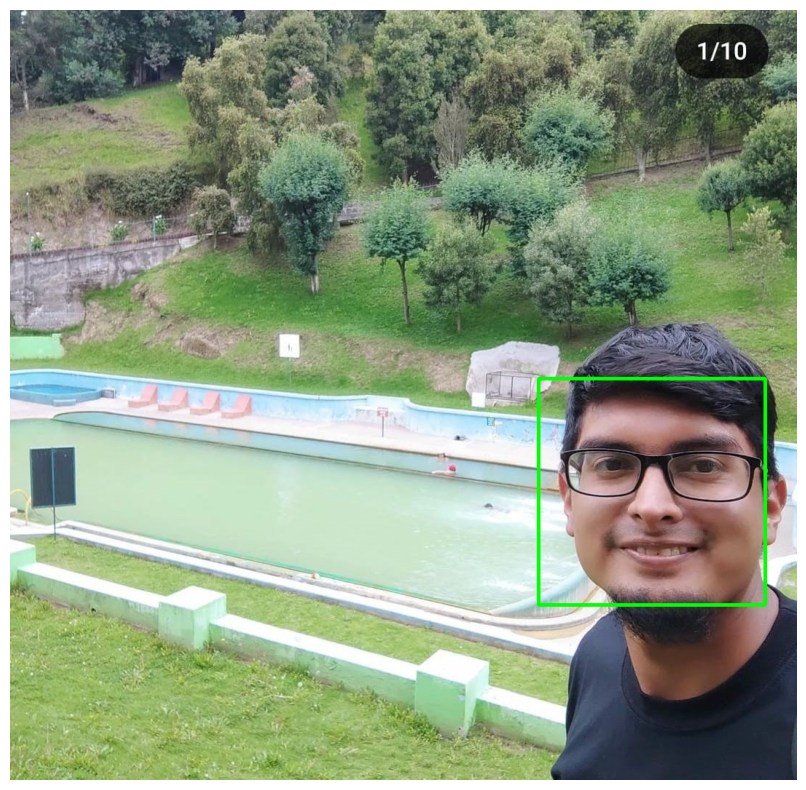

In [13]:
# Crear una figura de Matplotlib para mostrar la imagen
plt.figure(figsize=(20,10)) # Configuramos el tamaño de la figura
plt.imshow(img_rgb) # Mostramos la imagen en la figura
plt.axis('off') # No dibujamos los ejes de la figura

### 2.- Reconocimiento facial en tiempo real

In [15]:
pip install datetime

     ---------------------------------------- 0.0/44.1 kB ? eta -:--:--
     ---------------------------------------- 44.1/44.1 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   -------------------------------------- - 51.2/52.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 52.6/52.6 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/206.5 kB ? eta -:--:--
   ----------- ---------------------------- 61.4/206.5 kB 3.2 MB/s eta 0:00:01
   ----------------------- ---------------- 122.9/206.5 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  204.8/206.5 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 206.5/206.5 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import os
import face_recognition
import pandas as pd
from datetime import datetime

In [18]:
# Codificar rostros
dir = "./rostros_detectados"
facesEncodings = []
facesNames = []

for file_name in os.listdir(dir):
    imagen = cv2.imread(os.path.join(dir, file_name))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB) #BGR para OpenCV

    encodings = face_recognition.face_encodings(imagen) #detecta rostros y codifica, devuelve una lista de vetores
    # cada vector es un arreglo de 128 elementos que representan las caracteristicas del rostro
    if len(encodings) > 0: #si detecta almenos un rostro
        f_coding = encodings[0]
        facesEncodings.append(f_coding)
        facesNames.append(file_name.split(".jpg")[0])

# Crear un DataFrame vacío para almacenar nombres y horas
df = pd.DataFrame(columns=["Nombre", "Hora"])

# Leyendo video
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

#################
# Detector facial
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# cv2.CascadeClassifier: utilizada para cargar clasificadores en cascada. 
# Estos clasificadores se utilizan para detectar objetos en imágenes o videos.
# cv2.data.haarcascades es la ruta predeterminada en OpenCV donde se almacenan varios clasificadores Haar preentrenados.
# "haarcascade_frontalface_default.xml" es el archivo XML que contiene los datos del clasificador Haar 
# entrenado específicamente para la detección de rostros frontales.


while True:
    ret, frame = cap.read() 
    # ret: booleano, ¿capturó un cuadro?
    # frame cuadro capturado
    if not ret:
        break
    frame = cv2.flip(frame, 1) # orientación horizontal del cuadro
    orig = frame.copy() #guardar copia del cuadro antes de procesarlo
    faces = faceClassif.detectMultiScale(frame, 1.1, 5) # deteccion rostros en cuadro, 1.1 es la escala, 5 npumero de knn

    for (x, y, w, h) in faces: # iteracion sobre rostros  (x,y) superior izq, (w,h) ancho y altura del rectangulo
        face = orig[y:y+h, x:x+w] # extrae region del rostro
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB) #convierte a RGB

        # codificar y comparar rostros    
        encodings = face_recognition.face_encodings(face) #codificacion del rostro
        if len(encodings) > 0:
            actual_face_encoding = encodings[0]
            results = face_recognition.compare_faces(facesEncodings, actual_face_encoding) #compara codificacion del rostro  detectado
            #devuelve un booblean si hay coincidencia
            #print(results)

            #obtener nombre y color cuando rostros es conocido
            if True in results:
                index = results.index(True)
                name = facesNames[index]
                color = (125, 220, 0)
                
                # Verificar si la persona ya está en el DataFrame
                if not df['Nombre'].str.contains(name).any():
                    current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    new_entry = pd.DataFrame({"Nombre": [name], "Hora": [current_time]})
                    df = pd.concat([df, new_entry], ignore_index=True)
            else:
                name = "Desconocido"
                color = (50, 50, 255)
            
            cv2.rectangle(frame, (x, y+h), (x+w, y+h+30), color, -1) #rectangulo debajo del rostros para texto del nombre
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2) #rectangulo al rededor del rostro
            cv2.putText(frame, name, (x, y+h+25), 2, 1, (255, 255, 255), 2, cv2.LINE_AA) # nombre del rostro

    cv2.imshow("Frame", frame)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:  # Presiona 'ESC' para salir
        break

cap.release() #libera recurso de captura de video, para que la cam se cierre correctamente
cv2.destroyAllWindows() #cierra todas las ventanas de OpenCV

# Mostrar el DataFrame
print(df)

# Guardar el DataFrame en un archivo CSV
df.to_csv("personas_detectadas.csv", index=False)


  Nombre                 Hora
0  LUIS.  2024-06-23 10:19:01
